# A simple example of lensing estimator normalization calculation (Asymmetric estimator)
This code compute normalization of quadratic estiamtors

In [1]:
# external
import numpy as np, sys
from matplotlib.pyplot import *

In [2]:
# add path to tempura
path_to_tempura = "/global/homes/t/toshiyan/Work/Lib/tempura_dev/" # please change this path
sys.path.append(path_to_tempura) # example
import pytempura as cs

First define parameters

In [9]:
Tcmb  = 2.726e6    # CMB temperature
Lmax  = 3000       # maximum multipole of output normalization
lmax  = 3000
rlmin, rlmax = 100, 3000  # CMB multipole range for reconstruction
glmin, glmax = 100, 2000
llmin, llmax = rlmin, rlmax
L = np.linspace(0,Lmax,Lmax+1)
l = L.copy()
Lfac = (L*(L+1.))**2/(2*np.pi)

Load arrays of lensed CMB Cls. The Cls should not be multiplied by any factors and should not have units.  

In [10]:
lcl = np.zeros((4,lmax+1)) # TT, EE, BB, TE
lcl[:,2:] = np.loadtxt('data/lensedcls.dat',unpack=True,usecols=(1,2,3,4))[:,:lmax-1] 
lcl *= 2.*np.pi / (l**2+l+1e-30) / Tcmb**2

Define observed CMB cls. Here, no CMB noise.

In [11]:
ocl = lcl*1. # observed Cl (here, no CMB noise)

### Compute normalization

In [12]:
Ag0, Ac0 = cs.norm_general.qtt_asym('lens',Lmax,glmin,glmax,llmin,llmax,llmax,lcl[0,:],ocl[0,:],ocl[0,:])

In [13]:
Ag1, Ac1 = cs.norm_general.qtt('lens',Lmax,rlmin,rlmax,lcl[0,:],ocl[0,:])

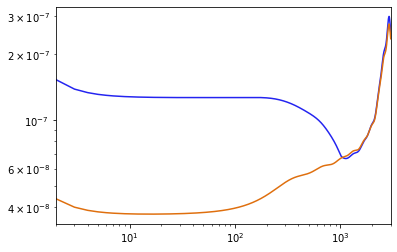

In [14]:
# plot spectra (gradient)
xlim(2,Lmax)
xscale('log')
yscale('log')
plot(L,Lfac*Ag0)
plot(L,Lfac*Ag1)